*   Name: Omar alSuntawi
*   Email: omar.alsuntawi@gmail.com
*   Phone: +201065561165

#Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier

from sklearn.datasets import make_blobs

import pickle

#Data loading

In [6]:
train_data = pd.read_csv('train.csv')
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [7]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


#Data Preproccessing

###Data exploration

In [9]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

###Data cleaning

In [11]:
# check for the missing values.
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
# Since the majority of the records are not missing, we will drop the null rows only.
null_columns = ['fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'ram', 'sc_h', 'sc_w','talk_time']
train_data.dropna(subset= null_columns , inplace= True)

In [13]:
test_data.drop(['id'] , inplace= True,axis=1)
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [14]:
# #Check if there are still missing values
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Correlation between the target and all the features

In [15]:
#Correlation with output variable
cor = train_data.corr()
cor_target = abs(cor["price_range"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

ram            0.917448
price_range    1.000000
Name: price_range, dtype: float64

It was observed that ram is the feature that is highly correlated to the price range, also the battery power and px width and height.

In [16]:
unrelevant_features = cor_target[cor_target<0.01]
unrelevant_features

clock_speed    0.006675
m_dep          0.001396
n_cores        0.004662
Name: price_range, dtype: float64

In [17]:
#drop the features of correlation less than 0.01 with the target.(weakly correlated)
train_data.drop(['clock_speed','m_dep','n_cores'],inplace=True,axis=1)
train_data

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,0,1.0,0.0,7.0,188.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,1,0.0,1.0,53.0,136.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,1,2.0,1.0,41.0,145.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,0,0.0,0.0,10.0,131.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,0,13.0,1.0,44.0,141.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0.0,1.0,2.0,106.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,1,0.0,0.0,39.0,187.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,1,1.0,1.0,36.0,108.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0,4.0,1.0,46.0,145.0,5.0,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


###Normalize the data where each column has different value ranges and we want to scale each value to be between 0 and 1, by using the MinMaxScaler from sklearn.preprocessing.

In [18]:
scaler = MinMaxScaler()

# Fit and transform the DataFrame
x_train_data = train_data.drop(['price_range'],axis=1)
x_train_normalized = pd.DataFrame(scaler.fit_transform(x_train_data), columns=x_train_data.columns)

x_train_normalized.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.0,0.052632,0.0,0.080645,0.900000,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,1.0,0.000000,1.0,0.822581,0.466667,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,1.0,0.105263,1.0,0.629032,0.541667,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.0,0.000000,0.0,0.129032,0.425000,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.0,0.684211,1.0,0.677419,0.508333,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


In [19]:
y_train_data = train_data['price_range']
y_train_data.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

###Split the dataset

In [20]:
numeric_features = ['battery_power',  'int_memory', 'mobile_wt', 'fc', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

In [21]:
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value=0)),('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [22]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

In [23]:
#divide the dataset into train and test sets.
X_train = preprocessor.fit_transform(x_train_normalized)
y_train_data = train_data['price_range']

x_train, x_val, y_train, y_val = train_test_split(X_train, y_train_data, test_size=0.2, random_state=42)

#Model Selection

###Random Forest

In [43]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_estimator.predict(x_val)

# Print the classification report and confusion matrix
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

# Optionally, print the best parameters found
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 135 candidates, totalling 675 fits
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.91      0.86      0.88        91
           2       0.81      0.88      0.84        92
           3       0.93      0.89      0.91       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

[[101   4   0   0]
 [  6  78   7   0]
 [  0   4  81   7]
 [  0   0  12 100]]
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [52]:
# Save the model to a file
with open('randomForest_best.pkl', 'wb') as file:
    pickle.dump(best_estimator, file)

In [50]:
#Testing

scaler = MinMaxScaler()

x_test_data = test_data.iloc[:10]
x_test_normalized = pd.DataFrame(scaler.fit_transform(x_test_data), columns=x_test_data.columns)

test = preprocessor.fit_transform(x_test_normalized)

pred10 = best_estimator.predict(test)
pred10

array([2, 2, 2, 3, 0, 2, 3, 0, 2, 0])

###KNN

In [54]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 31)),  # Try different numbers of neighbors
    'weights': ['uniform', 'distance']  # Try both uniform and distance weighting
}

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_estimator.predict(x_val)

# Print the classification report and confusion matrix
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

# Optionally, print the best parameters found
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.55      0.58      0.57        91
           2       0.52      0.51      0.51        92
           3       0.81      0.79      0.80       112

    accuracy                           0.69       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.69      0.69      0.69       400

[[88 17  0  0]
 [17 53 21  0]
 [ 0 25 47 20]
 [ 0  1 23 88]]
Best parameters: {'n_neighbors': 28, 'weights': 'distance'}


In [55]:
# Save the model to a file
with open('KNN_best.pkl', 'wb') as file:
    pickle.dump(best_estimator, file)

In [56]:
#Testing

scaler = MinMaxScaler()

x_test_data = test_data.iloc[:10]
x_test_normalized = pd.DataFrame(scaler.fit_transform(x_test_data), columns=x_test_data.columns)

test = preprocessor.fit_transform(x_test_normalized)

pred10 = best_estimator.predict(test)
pred10

array([2, 1, 2, 3, 0, 1, 3, 1, 1, 0])

###Naive Bayes

In [58]:
gnb = GaussianNB()

# Define the parameter grid for var_smoothing
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

# Initialize GridSearchCV
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predictions on the validation set
y_pred = grid_search.predict(x_val)

print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

# Optionally, print the best parameters found
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       105
           1       0.79      0.62      0.69        91
           2       0.67      0.79      0.73        92
           3       0.92      0.87      0.89       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400

[[100   5   0   0]
 [ 14  56  21   0]
 [  0  10  73   9]
 [  0   0  15  97]]
Best parameters: {'var_smoothing': 0.23101297000831597}


In [59]:
# Save the model to a file
with open('NB_best.pkl', 'wb') as file:
    pickle.dump(best_estimator, file)

In [60]:
#Testing

scaler = MinMaxScaler()

x_test_data = test_data.iloc[:10]
x_test_normalized = pd.DataFrame(scaler.fit_transform(x_test_data), columns=x_test_data.columns)

test = preprocessor.fit_transform(x_test_normalized)

pred10 = best_estimator.predict(test)
pred10

array([2, 2, 1, 3, 0, 2, 3, 0, 2, 0])

###Decision Tree

In [61]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=10)

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Get the best score
best_score = grid_search.best_score_
print("Best Score:", best_score)

# Predictions on the validation set
y_pred = grid_search.predict(x_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

# Optionally, print the best parameters found
print(f"Best parameters: {best_params}")

Best Score: 0.859375
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       105
           1       0.77      0.88      0.82        91
           2       0.77      0.78      0.77        92
           3       0.92      0.87      0.89       112

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400

[[92 13  0  0]
 [ 4 80  7  0]
 [ 0 11 72  9]
 [ 0  0 15 97]]
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [62]:
# Save the model to a file
with open('DT_best.pkl', 'wb') as file:
    pickle.dump(best_estimator, file)

In [63]:
#Testing

scaler = MinMaxScaler()

x_test_data = test_data.iloc[:10]
x_test_normalized = pd.DataFrame(scaler.fit_transform(x_test_data), columns=x_test_data.columns)

test = preprocessor.fit_transform(x_test_normalized)

pred10 = best_estimator.predict(test)
pred10

array([2, 2, 2, 3, 1, 2, 3, 0, 2, 0])

###Logistic Regression

In [24]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs']  # Changed from 'saga' to 'lbfgs'
}

# Initialize the LogisticRegression
lr = LogisticRegression(multi_class='multinomial', max_iter=200)  # Increased max_iter

# Initialize GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
LR_best = best_estimator

# Predict using the best estimator
y_pred = best_estimator.predict(x_val)

# Print the classification report and confusion matrix
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

# Optionally, print the best parameters found
print(f"Best parameters: {best_params}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       106
           1       0.97      0.97      0.97        89
           2       0.98      0.96      0.97       107
           3       0.99      0.99      0.99        97

    accuracy                           0.98       399
   macro avg       0.98      0.98      0.98       399
weighted avg       0.98      0.98      0.98       399

[[106   0   0   0]
 [  2  86   1   0]
 [  0   3 103   1]
 [  0   0   1  96]]
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceb

In [48]:
# Save the model to a file
with open('LR_best.pkl', 'wb') as file:
    pickle.dump(LR_best, file)

In [25]:
#Testing

scaler = MinMaxScaler()

x_test_data = test_data
x_test_normalized = pd.DataFrame(scaler.fit_transform(x_test_data), columns=x_test_data.columns)

test = preprocessor.fit_transform(x_test_normalized)

LR_predictions = best_estimator.predict(test)
LR_predictions

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

###SVM

In [93]:
param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmowithid'],
    'gamma': [1, 0.1, 0.01, 0.001]
}

# Initialize the classifier
svm_model = SVC(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
SVM_best = best_estimator

# Best score
best_score = grid_search.best_score_
print("Best Score:", best_score)

# Predictions on validation set
y_pred = grid_search.predict(x_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

Best Score: 0.9668749999999999
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.94      1.00      0.97        91
           2       0.98      0.97      0.97        92
           3       0.97      0.98      0.98       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

[[ 99   6   0   0]
 [  0  91   0   0]
 [  0   0  89   3]
 [  0   0   2 110]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

In [68]:
# Save the model to a file
with open('SVM_best.pkl', 'wb') as file:
    pickle.dump(best_estimator, file)

In [76]:
#Testing

scaler = MinMaxScaler()

x_test_data = test_data
x_test_normalized = pd.DataFrame(scaler.fit_transform(x_test_data), columns=x_test_data.columns)

test = preprocessor.fit_transform(x_test_normalized)

SVM_predictions = best_estimator.predict(test)
SVM_predictions

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 0, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 1, 2, 2, 3, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

# Best models for this problem are the logistic regression and SVM with accuracy about 0.98, Logistic Regression is selected for assessment

In [26]:
# Example true labels
y_true = y_val # actual true labels

# predicted for Logistic Regression
predictions = LR_best.predict(x_val)

In [27]:
# Each row in a confusion matrix represents an actual class,
# while each column represents a predicted class.

confusion_matrix(y_true, predictions)

array([[106,   0,   0,   0],
       [  2,  86,   1,   0],
       [  0,   3, 103,   1],
       [  0,   0,   1,  96]])

In [28]:
accuracy_score(y_true, predictions)

0.9799498746867168

In [29]:
# Out of those predicted positive, how many of them are actual positive?

precision = precision_score(y_true, predictions, average='micro')
print(f"Precision: {precision}")

Precision: 0.9799498746867168


In [30]:
# to combine precision and recall into a single metric

recall = recall_score(y_true, predictions, average='micro')
print(f"Recall: {recall}")

Recall: 0.9799498746867168


In [31]:
f1 = f1_score(y_true, predictions, average='micro')
print(f"F1: {f1}")

F1: 0.9799498746867168


In [32]:
#Synthetic Classification Dataset
#make 4-class dataset for classification

centers = [[-2, -2], [-2, 2], [2, 2], [2, -2]]  #Center of each class
X, y = make_blobs(n_samples=1000, centers=centers,n_features=23, random_state=40)
print("sample of X: ", X[0:5])
print("sample of y: ", y[0:5])

sample of X:  [[-2.09227256 -1.12927412]
 [-1.76257213 -2.39181357]
 [-3.3026177  -2.16682567]
 [ 0.90197303 -1.78399462]
 [-1.029888    2.68421299]]
sample of y:  [0 0 0 3 1]


<ipython-input-33-ea1a301b1573>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], cmap=plt.cm.Paired, edgecolor='black')


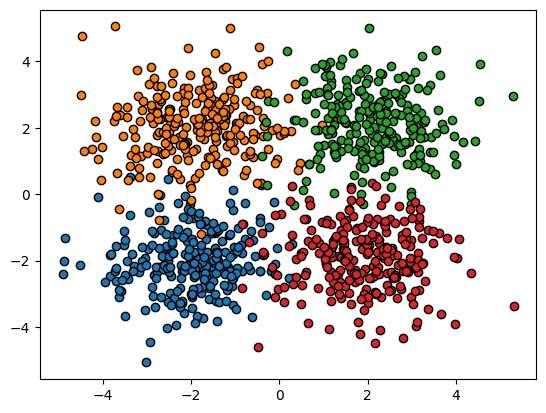

In [33]:
num_classes= 4
for i in range (num_classes):
  # get row indeces for samples with this class label
  idx = np.where(y == i)
  #Create a scatter plot
  plt.scatter(X[idx, 0], X[idx, 1], cmap=plt.cm.Paired, edgecolor='black')

In [34]:
LR_best.fit(X,y)

LogisticRegression(C=10, max_iter=200, multi_class='multinomial',
                   solver='newton-cg')

In [35]:
LR_best.coef_

array([[-1.83626685, -2.03540079],
       [-1.93963899,  2.16130455],
       [ 2.07267144,  2.20585359],
       [ 1.7032344 , -2.33175734]])

In [36]:
LR_best.predict_proba([[0,1]])

array([[0.0117209 , 0.63597984, 0.34391376, 0.0083855 ]])

In [37]:
#Extend the axis one step beyond the min and max values

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [38]:
h = .02  # step size in the mesh
x1grid= np.arange(x_min, x_max, h)
x2grid= np.arange(y_min, y_max, h)
print("Sample of X1 grid: ", x1grid[0:5])
print("Sample of X2 grid: ", x2grid[0:5])
print("Shape of X1 grid: ", x1grid.shape)
print("Shape of X2 grid: ", x2grid.shape)

Sample of X1 grid:  [-5.91223688 -5.89223688 -5.87223688 -5.85223688 -5.83223688]
Sample of X2 grid:  [-6.0672785 -6.0472785 -6.0272785 -6.0072785 -5.9872785]
Shape of X1 grid:  (611,)
Shape of X2 grid:  (606,)


In [39]:
xx, yy = np.meshgrid(x1grid,x2grid)
print(xx.shape)
print(yy.shape)

(606, 611)
(606, 611)


In [40]:
xx_flattened= xx.ravel()
yy_flattened= yy.ravel()
print("Shape of reshaped grid ", xx_flattened.shape)

Shape of reshaped grid  (370266,)


In [41]:
grid= np.c_[xx_flattened, yy_flattened]
print(grid.shape)

(370266, 2)


In [42]:
Z = LR_best.predict(grid)
print(Z.shape)

(370266,)


In [43]:
Z = Z.reshape(xx.shape)

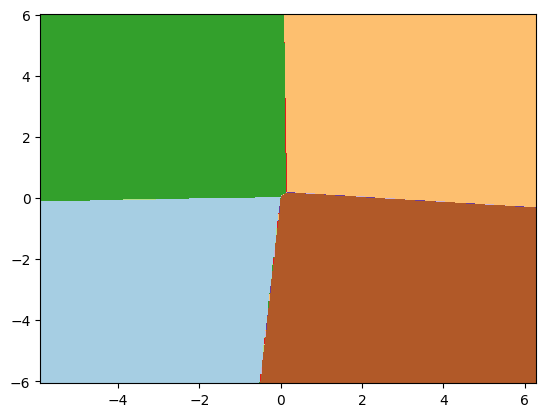

In [44]:
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

<ipython-input-47-6f98b9b39051>:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
<ipython-input-47-6f98b9b39051>:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,


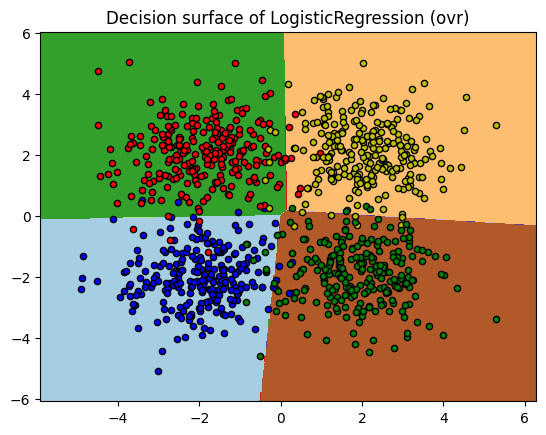

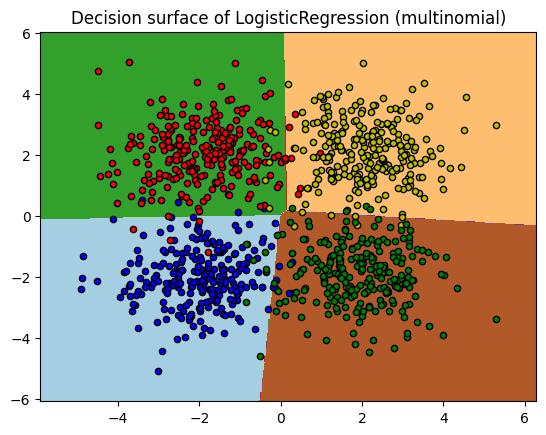

In [47]:
#Synthetic Classification Dataset
#make 4-class dataset for classification
centers = [[-2, -2], [-2, 2], [2, 2], [2, -2]]  #Center of each class
X, y = make_blobs(n_samples=1000, centers=centers,n_features=23, random_state=40)

#OVS vs Multinomial
for multi_class in ('ovr', 'multinomial'):
    LR_best.fit(X, y)  #Fit a logistic regression classifier

    # create a mesh to plot in
    # The first feature defines the x axis and the second defines the y axis

    # step size in the mesh
    h = .02

    #Extend the axis one step beyond the min and max values
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary.
    # For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = LR_best.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bryg"
    for i, color in zip(LR_best.classes_, colors):
        # get row indeces for samples with this class label
        idx = np.where(y == i)
        #Create a scatter plot and assign a color for all samples of the same class
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

plt.show()

##R

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)
model = joblib.load('model.pkl')

@app.route('/api/predict', methods=['POST'])
def predict():
    data = request.json
    prediction = model.predict(data)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
@RestController
@RequestMapping("/api/devices")
public class DeviceController {

    @Autowired
    private DeviceService deviceService;

    @PostMapping("/predict/{deviceId}")
    public ResponseEntity<?> predictPrice(@PathVariable Long deviceId) {
        Device device = deviceService.findById(deviceId);
        // Call Python API to predict price
        // Save the result in the device entity
        return ResponseEntity.ok(device);
    }
}

In [ ]:
@Service
public class DeviceService {

    @Autowired
    private DeviceRepository deviceRepository;

    @Transactional
    public Device addDevice(Device device) {
        // Add a new device
        return deviceRepository.save(device);
    }

    @Transactional
    public Device updatePricePrediction(Long deviceId, Double pricePrediction) {
        // Update the price prediction of a device
        return deviceRepository.findById(deviceId)
                .map(device -> {
                    device.setPricePrediction(pricePrediction);
                    return deviceRepository.save(device);
                })
                .orElseThrow(() -> new ResourceNotFoundException("Device not found"));
    }
}